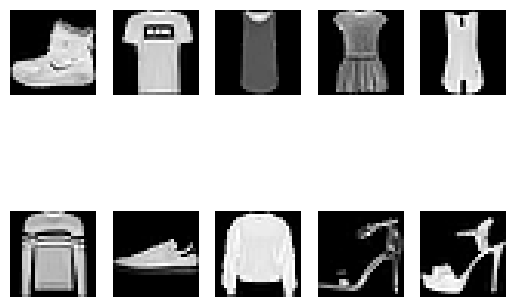

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7749 - loss: 0.6553 - val_accuracy: 0.8469 - val_loss: 0.4241 - learning_rate: 0.0010
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8631 - loss: 0.3800 - val_accuracy: 0.8625 - val_loss: 0.3814 - learning_rate: 0.0010
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8781 - loss: 0.3357 - val_accuracy: 0.8568 - val_loss: 0.3854 - learning_rate: 0.0010
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8834 - loss: 0.3148 - val_accuracy: 0.8578 - val_loss: 0.3909 - learning_rate: 0.0010
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8996 - loss: 0.2708 - val_accuracy: 0.8793 - val_loss: 0.3320 - learning_rate: 5.0000e-04
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9030 - loss: 0.2613 - val_accuracy: 0.8814 - val_loss: 0.3263 - learning_rate: 5.0000e-04
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9084 - loss: 0

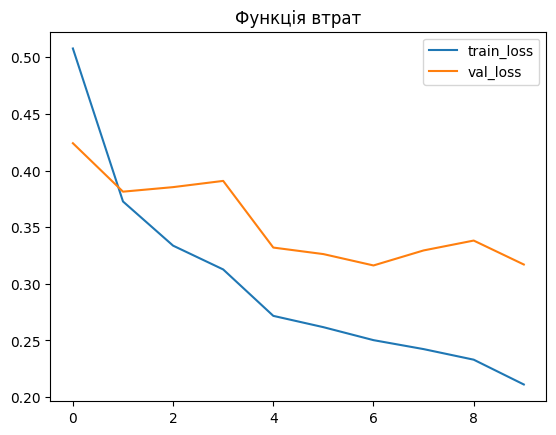

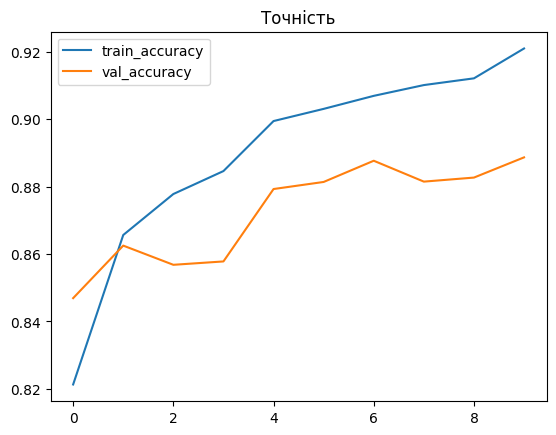

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.84      0.81      1000
           3       0.89      0.90      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.79      0.59      0.67      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



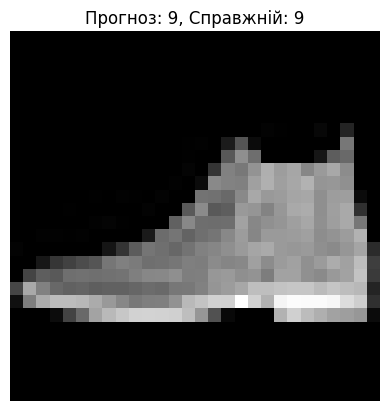

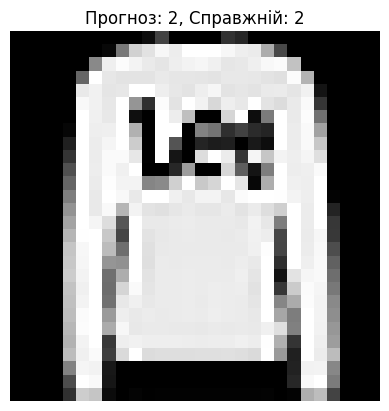

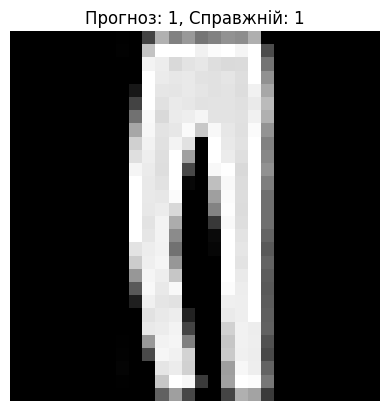

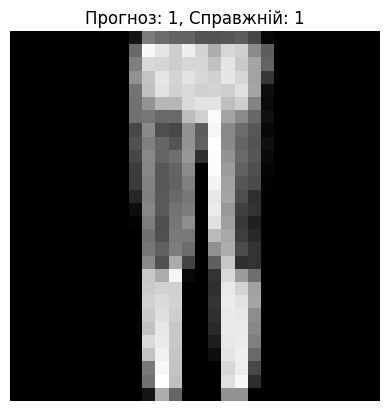

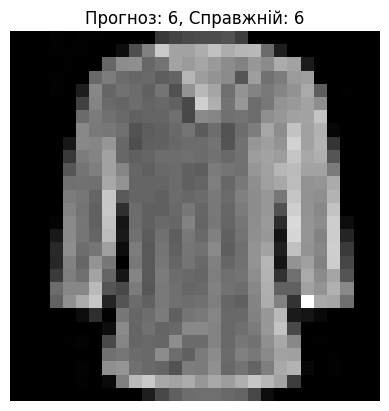

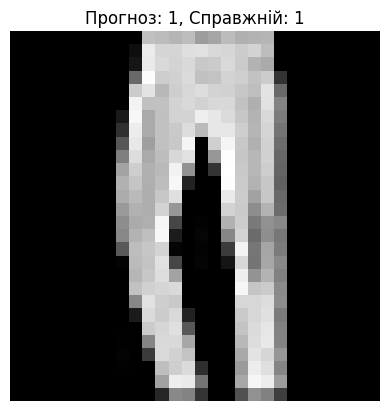

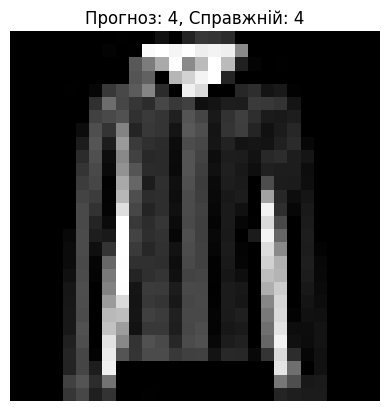

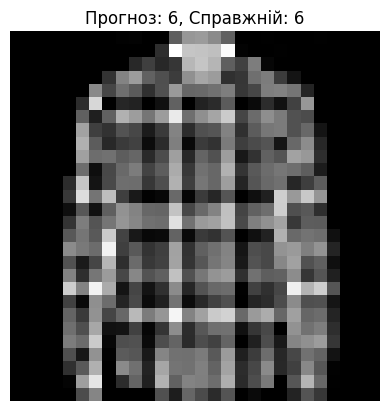

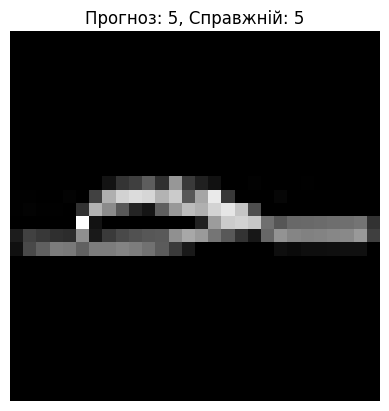

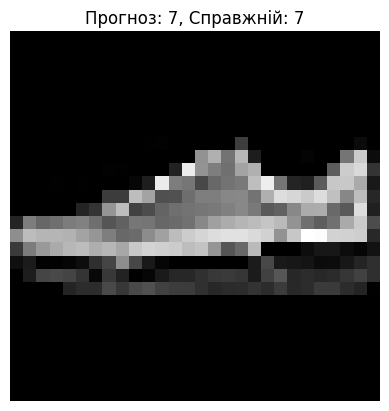

In [2]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from keras.utils import to_categorical

# 1. Завантаження датасету
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 2. Виведення 10 зображень
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

# 3. Підготовка даних
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# 4. Побудова архітектури моделі
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Використання ранньої зупинки та зменшення швидкості навчання
early_stop = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Виведення архітектури моделі
model.summary()

# 6. Тренування моделі
history = model.fit(train_images, train_labels_cat, epochs=20, batch_size=64,
                    validation_data=(test_images, test_labels_cat),
                    callbacks=[early_stop, reduce_lr])

# 7. Збереження моделі на Google Drive
model.save('/content/drive/My Drive/fashion_mnist_model.h5')

# 8. Побудова графіків функції втрат і точності
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Функція втрат')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Точність')
plt.legend()
plt.show()

# 9. Виведення класифікаційного звіту
test_pred = model.predict(test_images)
test_pred_labels = np.argmax(test_pred, axis=1)
print(classification_report(test_labels, test_pred_labels))

# 10. Виведення результатів розпізнавання для перших 10 зображень
for i in range(10):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Прогноз: {test_pred_labels[i]}, Справжній: {test_labels[i]}")
    plt.axis('off')
    plt.show()
